# Insight Analysis Demo

### The task at hand:

#### Why? (Goal)

The organization wants to know where to invest resources in future educational programs.

(Use survey data to make decisions about future projects.)
- Survey data (n=1000) collected over 1 month


#### How?
Compare (self-assessed) **eating disorder knowledge** accross different **occupational categories**.

- 'Eating disorder knowledge'
- 'Occupational category'


In [1]:
# Set-up

install.packages("ggplot2")
install.packages("dplyr")
install.packages("plyr")
install.packages("tidyverse")
install.packages("ggpubr")
install.packages("ggridges")
install.packages("multcomp")
install.packages("RAM")


# library(ggplot2)
# library(dplyr)
# library(plyr)
# library(tidyverse)
# library(ggpubr)

library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())
library(dplyr)
library(ggridges)
library(multcomp)
library(tidyverse)

# Read in the csv file:

CEDA_w_NA=read.csv("CEDAClean.csv", na.strings=c("","NA"))
str(CEDA_w_NA)

also installing the dependencies ‘ps’, ‘processx’, ‘callr’, ‘desc’, ‘pkgbuild’, ‘ellipsis’, ‘pkgload’, ‘praise’, ‘rlang’, ‘testthat’, ‘isoband’




  There is a binary version available but the source version is later:
      binary source needs_compilation
callr  3.4.2  3.4.3             FALSE


The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages


installing the source package ‘callr’




The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages

The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages


also installing the dependencies ‘vctrs’, ‘progress’, ‘fs’, ‘lifecycle’, ‘broom’, ‘dbplyr’, ‘forcats’, ‘haven’, ‘hms’, ‘httr’, ‘jsonlite’, ‘modelr’, ‘pillar’, ‘purrr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rstudioapi’, ‘rvest’, ‘stringr’, ‘tibble’, ‘tidyr’, ‘xml2’




  There are binary versions available but the source versions are later:
       binary source needs_compilation
fs      1.3.2  1.4.0              TRUE
tibble  2.1.3  3.0.0              TRUE
xml2    1.2.5  1.3.0              TRUE


The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages


installing the source packages ‘fs’, ‘tibble’, ‘xml2’

Warning message in install.packages("tidyverse"):
“installation of package ‘xml2’ had non-zero exit status”


The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages

The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages

The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages

The downloaded binary packages are in
	/var/folders/hh/xymmft6114g4g3zb_0vxkfrm0000gn/T//RtmpssTC8T/downloaded_packages


Warning message in get(method, envir = home):
“internal error -3 in R_decompress1”

ERROR: Error: package or namespace load failed for ‘ggplot2’ in get(method, envir = home):
 lazy-load database '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/ggplot2/R/ggplot2.rdb' is corrupt


## Constructing two variables

### RSR Score (Dependent Variable)
(Preparedness to recognize, support, and provide resources to individuals who may be experiencing EDs)

RSR Score: Aggregates respondents' responses regarding their self-assessed preparedness to recognize, support, and provide resources individuals who may be experiencing EDs. RSR Score incorporates answers for three survey questions:
- *Identify_Recognize*: ‘I believe I can recognize the signs of an eating disorder in others’
- *Identify_Support*: ‘I feel prepared to support someone who is experience an eating disorder’
- *Identify_Resources*: 'I know about the resources available to support people experiencing eating disorders’


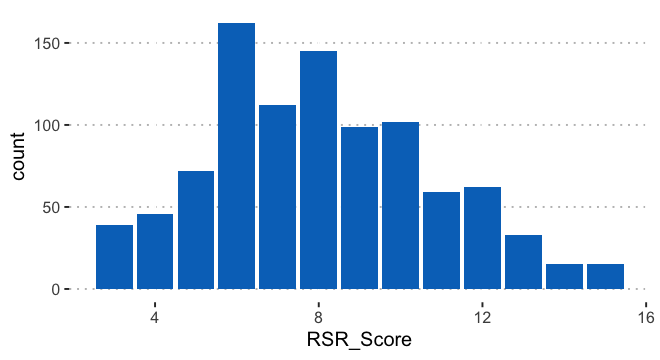

In [46]:
# A function that aggregates respondents' responses regarding their preparedness to recognize, support, and provide resources 
# individuals who may be experiencing EDs. # We check answers for three survey questions:
# Identify_Recognize: ‘I believe I can recognize the signs of an eating disorder in others’
# Identify_Support: ‘I feel prepared to support someone who is experience an eating disorder’
# Identify_Resources: 'I know about the resources available to support people experiencing eating disorders’


RSR_scoring <- function(df){

Identify_Recognize_num <- ConvertCategoriesNum(df$Identify_Recognize)  
Identify_Support <- ConvertCategoriesNum(df$Identify_Support)  
Identify_Resources <- ConvertCategoriesNum(df$Identify_Resources)

RSR_score <- Identify_Recognize_num + Identify_Support + Identify_Resources
RSR_score
}


RSR_score <- RSR_scoring(CEDA_w_NA)

# str(RSR_score)
# table(RSR_score)

# omit NAs
CEDA_w_NA$RSR_Score <- RSR_score
# summary(CEDA$RSR_Score) # - Has one NA, remove:
CEDA<- data.frame("RSR_Score" = na.omit(CEDA$RSR_Score), )
# summary(CEDA_narm)

options(repr.plot.width = 5.5, repr.plot.height = 3)

rsr_base <- ggplot(CEDA_narm, aes(RSR_Score))
# Number of cars in each class:
rsr_base + 
  geom_bar(fill = "#0073C2FF") +
  theme_pubclean()


### Occupational Categories (Independent Variable)
We compare the differences _between_ categories – first we must define the categories!

Occupation,counts
<chr>,<int>
Other,693
Education,92
Support,60
Health,44
Allied health,39
First responder,21
Fitness,13


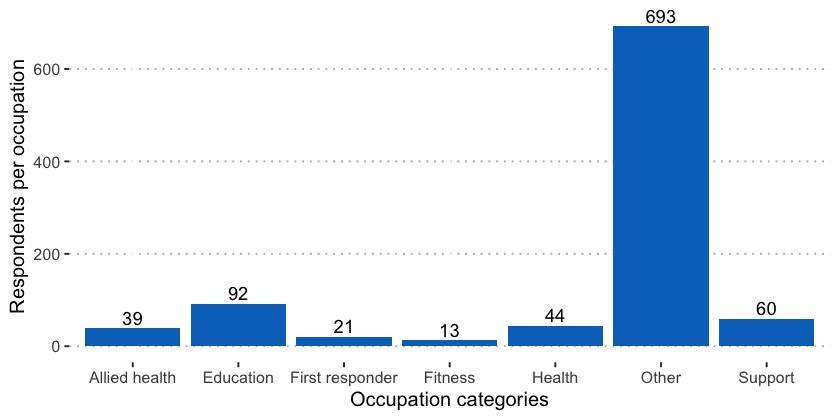

In [32]:
# This section creates respondent categories based on their occupation type. 
# (Variable name: Occupation_Cat_Lab)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# This section sets up boolean variables to make it easy to access subsets of the data by occupation

# Occupations_Sum is a pre-processed list of respondents occupations, broadly grouped by sector and by 
# their level of interaction with other people who they may provide services to in a professional capacity.
#
# This section processes of respondents' reported occupation and classifies it into the categories:
# Allied health, health, other care (non-medical including counselling, psychologists, etc) and 
# support-related professions, first responders, education, fitness, and other

# We classify respondent's occupations by creating boolean variables for each of these occupations:
# Boolean_occ_alliedhealth
# Boolean_occ_health
# Boolean_occ_support
# Boolean_occ_firstresp
# Boolean_occ_edu
# Boolean_occ_fitness
# Boolean_occu_other

# Below are the detailed break-downs of the occupations included in each category.

# Boolean_occ_alliedhealth: Health and allied health services for this analysis include:
# Note: Technicians in laboratories are excluded, because in survey respondent data it was not always 
# possible to separate non-medical lab technicians from medical lab technicians based on open-ended occupation 
# responses.
# Medical, Nurse practitioner, Nurse, Occupational therapist, Psychologist, Psychiatrist, Psychotherapist, 
# Physical therapist, General practitioner (family doctor), Paramedic, Social worker, Nutritionist or dietitian, 

# Boolean_occ_health: Interaction with health service users: 
# Medical, Nurse practitioner, Nurse, General practitioner (family doctor)

# Boolean_occ_support: Counselling, therapy, guidance, support, and social service work, social worker
# Counselling (other), Occupational therapist, psychologist, social service worker, Psychiatrist, 
# Psychotherapist, Social worker, Therapy (other)

# Boolean_occ_firstresp: First responders include:
# First responder (other), Firefighter, Paramedic, Police officer, Police (other)

# Boolean_occ_edu: Educator responders include:
# College/University course instructor/professor, School teacher, Education (other), School guidance counsellor

# Boolean_occ_fitness: Fitness professional include:
# Athletic team coach, Sports or fitness instructor, Personal fitness trainer

# Boolean_occu_other: Work environments not related to health, fitness, education.
# Admin, HR, Service/Retail/Sales, Management


# Analysis set-up:
# Boolean occupational category columns for occupation groups:

# Boolean_occ_alliedhealth
# Boolean_occ_health
# Boolean_occ_support
# Boolean_occ_firstresp
# Boolean_occ_edu
# Boolean_occ_fitness
# Boolean_occu_other

# Boolean_occ_alliedhealth: Health and allied health services for this analysis include:
# Note: Technicians in laboratories are excluded, because in survey respondent data it was not always 
# possible to separate non-medical lab technicians from medical lab technicians based on open-ended 
# occupation responses.
# Medical, Nutritionist or dietitian, 

# The boolean variables are created below:

Boolean_occ_alliedhealth <- c(CEDA$Occupations_Sum == "Medical"|
                          CEDA$Occupations_Sum == "Nutritionist or dietitian"
)

# Boolean_occ_health: Interaction with health service users: 
# Medical, Nurse practitioner, Nurse, General practitioner (family doctor)


Boolean_occ_health <- c(CEDA$Occupations_Sum == "Nurse practitioner"|
                          CEDA$Occupations_Sum == "Nurse"|
                          CEDA$Occupations_Sum == "General practitioner (family doctor)"
)

# Boolean_occ_support: Counselling, therapy, guidance, support, and social service work, social worker
# Counselling (other), School guidance counsellor, Occupational therapist, Psychologist, Social service worker, 
# Psychiatrist, Psychotherapist, Social worker, Therapy (other)

Boolean_occ_support <- c(CEDA$Occupations_Sum == "Counselling (other)"|
                           CEDA$Occupations_Sum == "Occupational therapist"|
                           CEDA$Occupations_Sum == "Psychologist"|
                           CEDA$Occupations_Sum == "Social service worker"|
                           CEDA$Occupations_Sum == "Psychiatrist"|
                           CEDA$Occupations_Sum == "Psychotherapist"|
                           CEDA$Occupations_Sum == "Social worker"|
                           CEDA$Occupations_Sum == "Therapy (other)"|
                           CEDA$Occupations_Sum == "School guidance counsellor"
) 

# Boolean_occ_firstresp: First responders include:
# First responder (other), Firefighter, Paramedic, Police officer, Police (other)

Boolean_occ_firstresp <- c(CEDA$Occupations_Sum == "First responder (other)"|
                             CEDA$Occupations_Sum == "Firefighter"|
                             CEDA$Occupations_Sum == "Paramedic"|
                             CEDA$Occupations_Sum == "Police officer"|
                             CEDA$Occupations_Sum == "Police (other)"
) 

# Boolean_occ_edu: Educator responders include:
# College/University course instructor/professor, School teacher, Education (other), School guidance counsellor

Boolean_occ_edu <- c(CEDA$Occupations_Sum == "College/University course instructor/professor"|
                       CEDA$Occupations_Sum == "School teacher"|
                       CEDA$Occupations_Sum == "Education (other)"
) 

# Boolean_occ_fitness: Fitness professional include:
# Athletic team coach, Sports or fitness instructor, Personal fitness trainer

Boolean_occ_fitness <- c(CEDA$Occupations_Sum == "Athletic team coach"|
                           CEDA$Occupations_Sum == "Sports or fitness instructor"|
                           CEDA$Occupations_Sum == "Personal fitness trainer"
) 

# Boolean_occu_other: Work environments not related to health, fitness, education.
# Admin, HR, Service/Retail/Sales, Management

Boolean_occ_other <- c(CEDA$Occupations_Sum == "Admin"|
                         CEDA$Occupations_Sum == "HR"|
                         CEDA$Occupations_Sum == "Service/Retail/Sales"|
                         CEDA$Occupations_Sum == "Management"
) 


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Brief summaries of each occupational category :
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# summary(Boolean_occ_alliedhealth)
# summary(Boolean_occ_health)
# summary(Boolean_occ_support)
# summary(Boolean_occ_firstresp)
# summary(Boolean_occ_edu)
# summary(Boolean_occ_fitness)
# summary(Boolean_occ_other)



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#
# To work more easily with each occupational we write functions to calculate 'grade' the stigma and 
# literacy scores of a group of survey respondents.
# We create a subgroup for each occupational category, and then create a function that allows us
# to grade how a subgroup scored on their attitudes and knowledge of EDs (a stigma and a literacy score)
# We also create a function that applies the scoring function to all subgroups, to automate the
# process of scoring all of the occupational categories.
#
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# First create a subset for each occupational category, with the help of the boolean variables set up above. 
# We can use these subsets to calculate literacy and stigma scores, as well as descriptive statistics 
# (e.g. mean, sd, etc) for each ocupational category.

Group_alliedhealth <- subset(CEDA,Boolean_occ_alliedhealth==TRUE)
Group_health <- subset(CEDA,Boolean_occ_health==TRUE)  
Group_support <- subset(CEDA,Boolean_occ_support==TRUE) 
Group_firstresp <- subset(CEDA,Boolean_occ_firstresp==TRUE)   
Group_edu <- subset(CEDA,Boolean_occ_edu==TRUE)
Group_fitness <- subset(CEDA,Boolean_occ_fitness==TRUE)  
Group_other <- subset(CEDA,Boolean_occ_other==TRUE)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# And create a column of zeros/ones for each class

CEDA$Num_occ_alliedhealth  <- as.numeric(Boolean_occ_alliedhealth)
CEDA$Num_occ_health  <- as.numeric(Boolean_occ_health)
CEDA$Num_occ_support  <- as.numeric(Boolean_occ_support)
CEDA$Num_occ_firstresp  <- as.numeric(Boolean_occ_firstresp)
CEDA$Num_occ_edu  <- as.numeric(Boolean_occ_edu)
CEDA$Num_occ_fitness  <- as.numeric(Boolean_occ_fitness)


# We assign eaach category a numerical in the vector 'Occupation_Cat':

CEDA$Occupation_Cat <- CEDA$Num_occ_alliedhealth + 2*CEDA$Num_occ_health + 3*CEDA$Num_occ_support + 
    4*CEDA$Num_occ_firstresp + 5*CEDA$Num_occ_edu + 6*CEDA$Num_occ_fitness 
# table(CEDA$Occupation_Cat)

# Allied health = Category 1
# Health = Category 2
# Support = Category 3
# First responders = Category 4
# Education = Category 5
# Fitness = Category 6
# Other = Category 0

# Check for no repeating categories (to satisfy analysis conditions that categories are independent):

CEDA$Occupation_Conditions <- CEDA$Num_occ_alliedhealth + CEDA$Num_occ_health + CEDA$Num_occ_support + 
    CEDA$Num_occ_firstresp + CEDA$Num_occ_edu + CEDA$Num_occ_fitness 

# The test bellow checks that every respondend is assigned to exactly one category (i.e. has exactly one value of 1 
# among all boolean categorical variables)
# max(CEDA$Occupation_Conditions)


# We create a new column, Occupation_Cat_Lab, for the occupational categorical variable
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 1, "Allied health","Other")       # 'Other' category is labelled here
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 2, "Health",CEDA$Occupation_Cat_Lab)
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 3, "Support",CEDA$Occupation_Cat_Lab)
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 4, "First responder",CEDA$Occupation_Cat_Lab)
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 5, "Education",CEDA$Occupation_Cat_Lab)
CEDA$Occupation_Cat_Lab <- ifelse(CEDA$Occupation_Cat == 6, "Fitness",CEDA$Occupation_Cat_Lab)

# table(CEDA$Occupation_Cat_Lab)

# A quick plot to look at counts of respondents per category:

# cat_counts_1 <- ggplot(CEDA, aes(Occupation_Cat_Lab)) +
#    geom_bar(fill = "#0073C2FF") +
#    theme_pubclean() + 
#    coord_flip() +
#    ylab("Respondents per occupation") + xlab("Occupation categories")

# Same as above but bars reordered by frequency of response, and resized


df_cat_counts <- CEDA %>%
  group_by(Occupation = Occupation_Cat_Lab) %>%
  summarise(counts = n()) %>%
  arrange(desc(counts))


df_cat_counts

options(repr.plot.width = 7, repr.plot.height = 3.5)

ggplot(df_cat_counts, aes(x = Occupation, y = counts)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = counts), vjust = -0.3) + 
  theme_pubclean() +
  ylab("Respondents per occupation") + xlab("Occupation categories")



In [48]:
# WE DEFINE A FEW A FEW SET-UP FUNCTIONS:


# Many variables have answers ranging from 'Strongly agree' to 'Strongly disagree'
# We create a function to convert these variables to numbers:
   
# A function that convers categorical data to numerical (Strongly agree = 5, ..., Strongly disagree = 0)
   
ConvertCategoriesNum <- function(column){
  
  numerical <- 
    ifelse(column == "Strongly agree", 5,
           ifelse(column == "Somewhat agree",4,
                  ifelse(column == "Neither disagree nor agree"|column == "Neither disagree or agree",3,
                         ifelse(column == "Disagree"|column == "Somewhat disagree",2,
                                ifelse(column == "Strongly disagree",1,0
                                )))))
  
  numerical
}

# A function that convers categorical data to numerical (Strongly DISAGREE = 5, ..., Strongly AGREE = 0)
# (This is the 'reverse function from the one above)

ConvertCategoriesNum_Rev <- function(column){
  
  numerical <- 
    ifelse(column == "Strongly agree", 1,
           ifelse(column == "Somewhat agree",2,
                  ifelse(column == "Neither disagree nor agree"|column == "Neither disagree or agree",3,
                         ifelse(column == "Disagree"|column == "Somewhat disagree",4,
                                ifelse(column == "Strongly disagree",5,0
                                )))))
  
  numerical
}

Picking joint bandwidth of 1.07
Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”

Occupation,mean,max,min,sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Support,9.850000,15,3,2.748343
Allied health,9.552632,14,3,2.983716
First responder,8.952381,14,5,2.801360
Health,8.636364,15,4,2.796101
Fitness,8.307692,12,5,2.097006
Education,7.891304,15,3,2.959271
Other,7.776335,15,3,2.622802


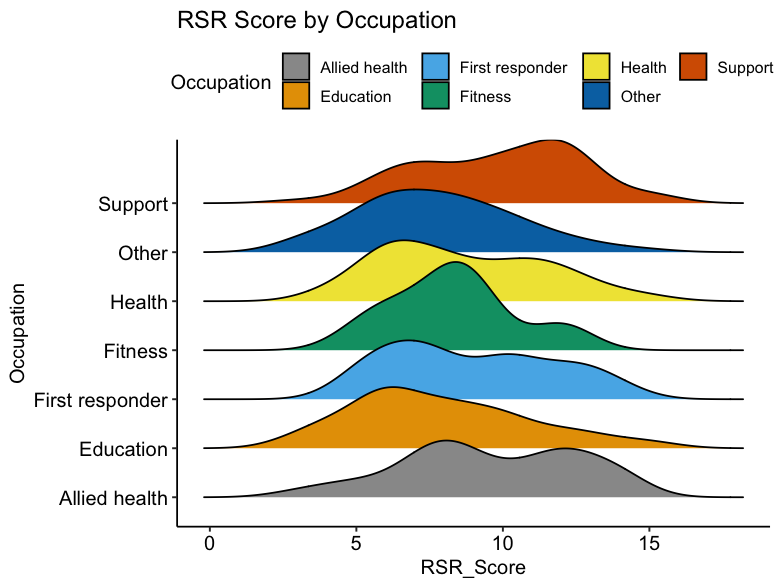

In [49]:
# Create a dataframe (CEDA_analysis) that will be used for analyses regarding questions 4, 8, 
# and respondents' RSR scores

CEDA_analysis <- data.frame("Occupation" = CEDA$Occupation_Cat_Lab,
                              "RSR_Score" = RSR_score
                              )

# Graph of distributions of RSR Score by Occupational Category:

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")


options(repr.plot.width = 6.5, repr.plot.height = 4.9)
ggplot(
  CEDA_analysis, 
    aes(x = RSR_Score, y = Occupation)) +
    geom_density_ridges(aes(fill = Occupation)) +
    scale_fill_manual(values = cbPalette)+
    labs(title = "RSR Score by Occupation") 


means_cat <- CEDA_analysis %>%
  group_by(Occupation) %>%
  summarise(mean = mean(RSR_Score,na.rm=TRUE), 
            max= max(RSR_Score,na.rm=TRUE), 
            min = min(RSR_Score,na.rm=TRUE), 
            sd = sd(RSR_Score,na.rm=TRUE)) %>%
  arrange(desc(mean))

means_cat

# Analysis

## ANOVA
Is there an effect?

In [34]:
# ANOVA:
# Ho: The mean RSR score is the same accross occupational categories
# Ho: The mean RSR score is the same accross occupational categories

# tapply(CEDA_analysis$RSR_Score,CEDA_analysis$Occupation,mean, na.rm=TRUE)

anova_RSR <- aov(RSR_Score ~ Occupation, data=CEDA_analysis)

summary(anova_RSR)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Occupation    6    367   61.24   8.494 5.27e-09 ***
Residuals   954   6878    7.21                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

## Tukey's HSD
What is the effect?

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = RSR_Score ~ Occupation, data = CEDA_analysis)

$Occupation
                                    diff        lwr        upr     p adj
Education-Allied health       -1.6613272 -3.1911936 -0.1314609 0.0232606
First responder-Allied health -0.6002506 -2.7574590  1.5569577 0.9827011
Fitness-Allied health         -1.2449393 -3.7940526  1.3041741 0.7782106
Health-Allied health          -0.9162679 -2.6732055  0.8406696 0.7199310
Other-Allied health           -1.7762968 -3.0981031 -0.4544905 0.0014955
Support-Allied health          0.2973684 -1.3474318  1.9421686 0.9983382
First responder-Education      1.0610766 -0.8576063  2.9797595 0.6602360
Fitness-Education              0.4163880 -1.9343087  2.7670847 0.9985194
Health-Education               0.7450593 -0.7091159  2.1992345 0.7365636
Other-Education               -0.1149696 -0.9952921  0.7653530 0.9997424
Support-Education              1.9586957  0

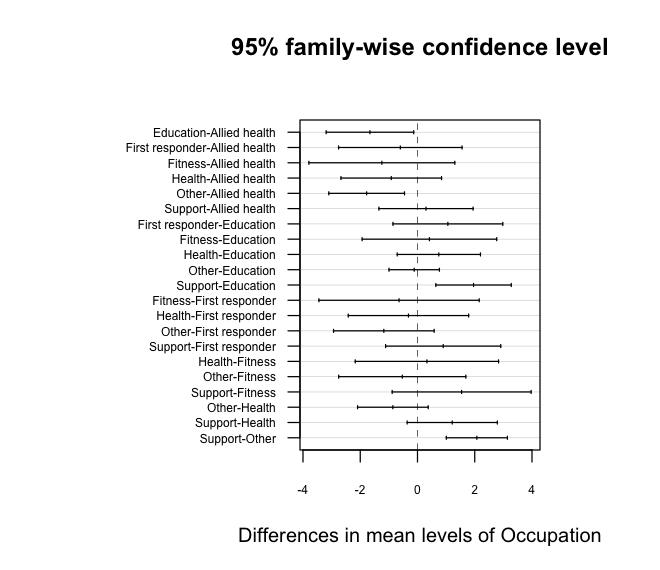

In [35]:
# We note that we have a few low p-vals: Education-Allied health, Other-Allied health, Support-Education, and Support-Other
tuk <- TukeyHSD(anova_RSR)
tuk
options(repr.plot.width = 5.5, repr.plot.height = 4.75)
with(par(mai=c(1,2.5,1,1)),{plot(tuk, las=1,cex.axis=0.6)})

# plot(tuk) # Default plot without formatting

# Examining the differences, we see that Support and Allied Health scored significantly higher, particularly relative to Education and Other
# Other occupation groups scored somewhere in between, and where not statistically distinguishable


## Compact Letter Display
Interpreting the results.

In [33]:
# Compact letter display:
tuk_2 <- glht(anova_RSR, linfct = mcp(Occupation = "Tukey"))
### extract information
tuk.cld <- cld(tuk_2)
#cld.letters <- print(tuk.cld)
tibble.cld <- tibble(categories = names(cld.letters), cld = cld.letters)
tibble.cld %>% arrange(cld)

categories,cld
<chr>,<chr>
Education,a
Other,a
First responder,ab
Fitness,ab
Health,ab
Allied health,b
Support,b


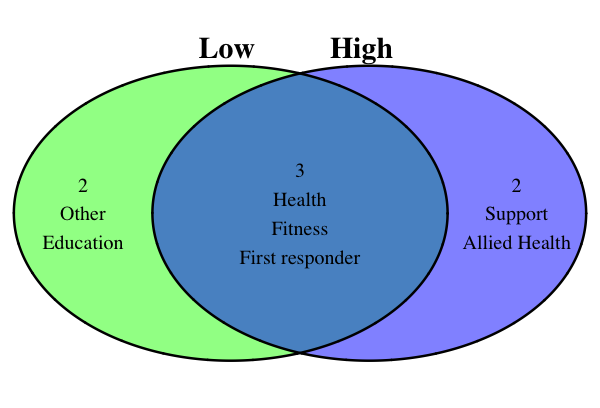

In [37]:
# Venn diagram of compact letter display
library(RAM)

options(repr.plot.width = 5, repr.plot.height = 3.4)
High_RSR_Score <- c('Support','Allied Health','Health','Fitness','First responder')
Low_RSR_Score <- c('Health','Fitness','First responder', 'Other', 'Education')
group.venn(list('Low '=Low_RSR_Score, 'High  '=High_RSR_Score), label=TRUE, 
    fill = c("green", "blue"),
    cat.pos = c(0, 0),
    lab.cex=1)

### Drawing actionable conclusions


- **Stigma Score**: Attitudes and beliefs which were seen as stigmatizing ED
- **Literacy Score**: An ED literacy score, quiz-score based
- **Openness to ED education**: ED-related education education, openness to and work towards receiving more ED-related education
- **RSR score**: Preparedness to recognize, support, and provide resources to individuals who may be experiencing EDs